# Analyse der HANA - SSBM Benchmark Log Dateien

## Einstellungen

Bitte passen sie die Einstellungen bei Bedarf an.

In [21]:
from util import Analyser
LOG_PATH="../../../ssbm/i7-6core.log"
analyser = Analyser(LOG_PATH)

## Allgemein:
Im folgenden wird die allgemeine Laufzeit des Benchmarks analysiert
mit folgenden Testspezifikationen

Wiederholungen:

In [22]:
print(analyser.get_repetitions())

250


CPU: Intel i7 4.2ghz

CPU Kerne: 6

RAM: 8GB

### Zeilenbasiert
Im folgenden wird die allgemeine Laufzeit des Benchmarks
bei einem zeilenbasierten Schmata betrachted.

In [23]:
benchmark = analyser.get_row_benchmark()
benchmark.print_stats()

Samples,250
Average,3539840
Min,3353808
Max,4283873
Median,3519021
Standard Deviation,110172
Total,884960100


## Spaltenbasiert
Im folgenden wird die allgemeine Laufzeit des Benchmarks bei einem
spaltenbasierten Schemata betrachtet

In [24]:
benchmark = analyser.get_column_benchmark()
benchmark.print_stats()

Samples,250
Average,753846
Min,725573
Max,852537
Median,750227
Standard Deviation,17032
Total,188461397


### Vergleich Zeilenbasiert vs. Spaltenbasiert

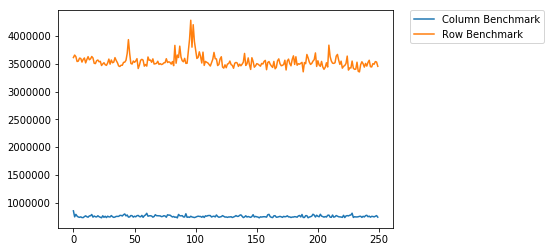

In [25]:
from util import Comparison

column_benchmark = analyser.get_column_benchmark()
row_benchmark = analyser.get_row_benchmark()
comparison = Comparison(column_benchmark, row_benchmark)

comparison.compare_visually()

### Stabilität des Benchmarks

#### Spaltenbasiert

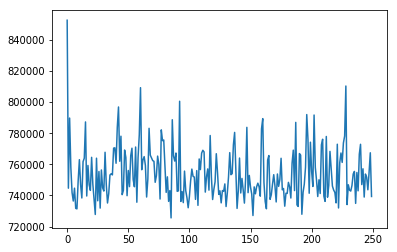

In [26]:
from matplotlib import pyplot as plt, mlab

benchmark = analyser.get_column_benchmark()
plt.plot(benchmark.get_times())
plt.show()

#### Zeilenbasiert

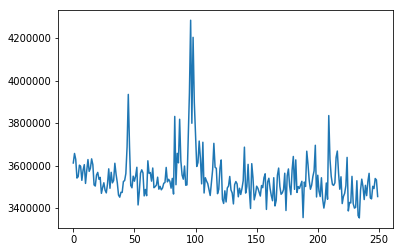

In [27]:
benchmark = analyser.get_row_benchmark()
plt.plot(benchmark.get_times())
plt.show()

## Betrachtung einzelner Queries
Im folgenden werden die einzelnen Queries des SSBM Benchmarks betrachted.

### Spaltenbasiert

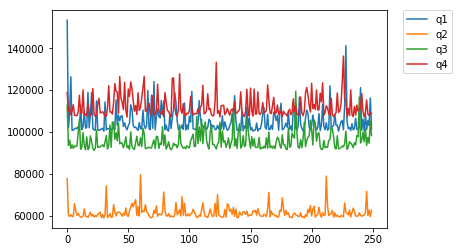

In [28]:
from util import display_table
import re

benchmark = analyser.get_column_benchmark()

query_stats = benchmark.get_query_stats(lambda x: not re.search("\\.", x))
comparison = Comparison(*query_stats)
comparison.compare_visually()

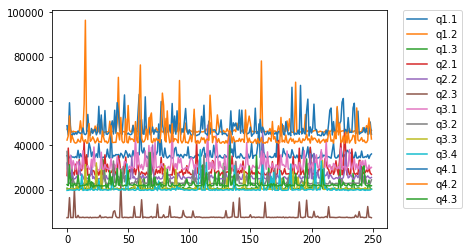

In [29]:
query_stats = benchmark.get_query_stats()
comparison = Comparison(*query_stats)
comparison.compare_visually()

In [30]:
comparison.compare_raw()

,q1.1,q1.2,q1.3,q2.1,q2.2,q2.3,q3.1,q3.2,q3.3,q3.4,q4.1,q4.2,q4.3
Samples,250,250,250,250,250,250,250,250,250,250,250,250,250
Min,34129,45808,20238,26428,24704,7337,28743,22576,20152,19645,44133,40833,21570
Median,35190,46333,20530,27592,25396,7590,30290,22970,20345,19948,45846,42344,22006
Average,36021,47540,21240,28789,26031,8127,31487,23712,20960,20757,47981,43807,22897
Max,51032,96450,33864,47633,46637,22345,49159,37298,33215,38151,67080,76294,40016
Standard Deviation,2561,4590,2218,3231,2363,1926,3326,2189,2009,2658,4595,4644,2606
Total,9005368,11884875,5310125,7197166,6507845,2031652,7871755,5928021,5239877,5189319,11995198,10951775,5724236


In [31]:
comparison.compare()

,q1.1,q1.2,q1.3,q2.1,q2.2,q2.3,q3.1,q3.2,q3.3,q3.4,q4.1,q4.2,q4.3
Samples,250,250,250,250,250,250,250,250,250,250,250,250,250
Min,0.7,1.0,0.34,0.5,0.45,0.0,0.56,0.4,0.33,0.32,0.96,0.87,0.37
Median,0.71,1.0,0.33,0.52,0.46,0.0,0.59,0.4,0.33,0.32,0.99,0.9,0.37
Average,0.7,0.99,0.33,0.52,0.45,0.0,0.59,0.39,0.32,0.32,1.0,0.9,0.37
Max,0.39,1.0,0.16,0.34,0.33,0.0,0.36,0.2,0.15,0.21,0.6,0.73,0.24
Standard Deviation,0.23,0.98,0.11,0.48,0.16,0.0,0.52,0.1,0.03,0.27,0.98,1.0,0.25
Total,0.7,0.99,0.33,0.52,0.45,0.0,0.59,0.39,0.32,0.32,1.0,0.9,0.37


## Zeilenbasiert

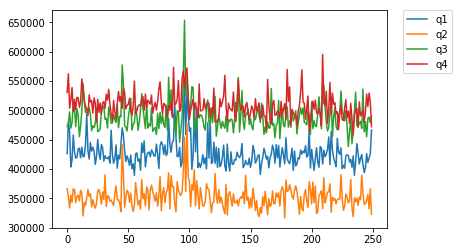

In [32]:
benchmark = analyser.get_row_benchmark()
query_stats = benchmark.get_query_stats(lambda x: not re.search("\\.", x))
comparison = Comparison(*query_stats)
comparison.compare_visually()

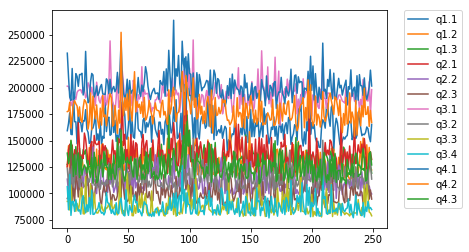

In [33]:
query_stats = benchmark.get_query_stats()
comparison = Comparison(*query_stats)
comparison.compare_visually()

In [34]:
comparison.compare_raw()

,q1.1,q1.2,q1.3,q2.1,q2.2,q2.3,q3.1,q3.2,q3.3,q3.4,q4.1,q4.2,q4.3
Samples,250,250,250,250,250,250,250,250,250,250,250,250,250
Min,139262,112439,112568,117244,95313,86286,164355,100648,77849,76904,180332,154055,108263
Median,161316,128768,128036,136598,109964,98782,191788,112815,84566,84834,199441,176652,123732
Average,163493,130395,129797,137933,111647,101491,193402,114821,87827,87813,201572,178415,125001
Max,227621,180440,174000,195303,146286,146433,245002,152274,128157,126714,263616,252192,168002
Standard Deviation,14016,11331,9751,12891,10454,9918,10989,9269,9073,8307,12088,12302,10744
Total,40873234,32598752,32449355,34483239,27911848,25372675,48350492,28705352,21956785,21953176,50393118,44603740,31250165


In [35]:
comparison.compare()

,q1.1,q1.2,q1.3,q2.1,q2.2,q2.3,q3.1,q3.2,q3.3,q3.4,q4.1,q4.2,q4.3
Samples,250,250,250,250,250,250,250,250,250,250,250,250,250
Min,0.6,0.34,0.34,0.39,0.18,0.09,0.85,0.23,0.01,0.0,1.0,0.75,0.3
Median,0.67,0.38,0.38,0.45,0.22,0.12,0.93,0.25,0.0,0.0,1.0,0.8,0.34
Average,0.67,0.37,0.37,0.44,0.21,0.12,0.93,0.24,0.0,0.0,1.0,0.8,0.33
Max,0.74,0.39,0.35,0.5,0.14,0.14,0.86,0.19,0.01,0.0,1.0,0.92,0.3
Standard Deviation,1.0,0.53,0.25,0.8,0.38,0.28,0.47,0.17,0.13,0.0,0.66,0.7,0.43
Total,0.67,0.37,0.37,0.44,0.21,0.12,0.93,0.24,0.0,0.0,1.0,0.8,0.33


## Indizes

### Vergleich von allen Messwerten

In [36]:
column_benchmark = analyser.get_column_benchmark()
index_column_benchmark = analyser.get_column_benchmark_I()
row_benchmark = analyser.get_row_benchmark()
index_row_benchmark = analyser.get_row_benchmark_I()
comparison = Comparison(column_benchmark, index_column_benchmark, row_benchmark, index_row_benchmark)

comparison.compare_raw()

,Column Benchmark,Column Benchmark with Index,Row Benchmark,Row Benchmark with Index
Samples,250,250,250,250
Min,725573,231509,3353808,2839066
Median,750227,556266,3519021,3006796
Average,753846,449355,3539840,3048515
Max,852537,2659574,4283873,3394505
Standard Deviation,17032,208285,110172,124259
Total,188461397,112338763,884960100,762128739


In [37]:
comparison.compare()

,Column Benchmark,Column Benchmark with Index,Row Benchmark,Row Benchmark with Index
Samples,250,250,250,250
Min,0.16,0.0,1.0,0.84
Median,0.07,0.0,1.0,0.83
Average,0.1,0.0,1.0,0.84
Max,0.0,0.53,1.0,0.74
Standard Deviation,0.0,1.0,0.49,0.56
Total,0.1,0.0,1.0,0.84


### Spaltenbasiert

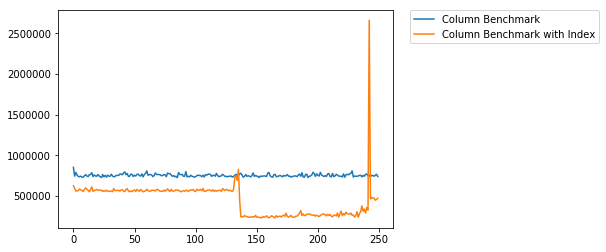

In [38]:
column_benchmark = analyser.get_column_benchmark()
index_column_benchmark = analyser.get_column_benchmark_I()
comparison = Comparison(column_benchmark, index_column_benchmark)

comparison.compare_visually()

In [39]:
comparison.compare_raw()

,Column Benchmark,Column Benchmark with Index
Samples,250,250
Min,725573,231509
Median,750227,556266
Average,753846,449355
Max,852537,2659574
Standard Deviation,17032,208285
Total,188461397,112338763


### Zeilenbasiert

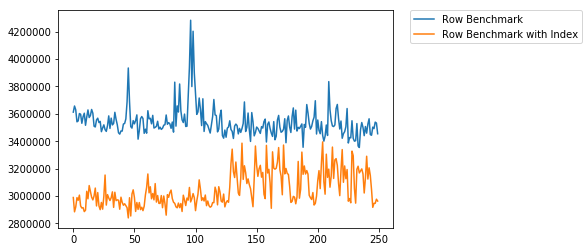

In [40]:
row_benchmark = analyser.get_row_benchmark()
index_row_benchmark = analyser.get_row_benchmark_I()
comparison = Comparison(row_benchmark, index_row_benchmark)

comparison.compare_visually()

In [41]:
comparison.compare_raw()

,Row Benchmark,Row Benchmark with Index
Samples,250,250
Min,3353808,2839066
Median,3519021,3006796
Average,3539840,3048515
Max,4283873,3394505
Standard Deviation,110172,124259
Total,884960100,762128739
